In [117]:
import pandas as pd
import matplotlib

import matplotlib.cm as cm

In [118]:
%run data.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb
%run ../modules/utils.ipynb

In [119]:
from datetime import datetime
def print_now():
    now = datetime.now()
    print(now.strftime('%m/%d/%Y %H:%M:%S'))

In [4]:
# Yue's Data
df1 = pd.read_excel('~/Documents/ChenLab/DataYue/Glu/DrChen_tRNA_s1.xlsx')
df2 = pd.read_excel('~/Documents/ChenLab/DataYue/Glu/UC_glu_2_new.xlsx')
df1_ad = pd.read_excel('~/Documents/ChenLab/DataYue/Glu/DrChen_tRNAs5_complete.xlsx')
df2_ad = pd.read_excel('~/Documents/ChenLab/DataYue/Glu/DrChen_tRNAs6_complete.xlsx')

df1 = thermo_df(df1)
df2 = thermo_df(df2)
df1_ad = thermo_df(df1_ad)
df2_ad = thermo_df(df2_ad)
print_now()

10/01/2021 14:25:31


In [127]:
# My Data, May
df1 = load_uc_glu(1) # Glu May control data
df2 = load_uc_glu(2) # Glu May control data

df1_ad = load_uc_glu(5, True) # Glu May AD data
df2_ad = load_uc_glu(6, True) # Glu May AD data
print_now()

10/27/2021 00:14:23


In [121]:
# June Date
df1 = load_uc2(5, intact=True) # Glu June control data
df2 = load_uc2(6, intact=True)
# df1_ad = load_uc2(17)
df1_ad = pd.read_excel('/Users/bryan/Documents/ChenLab/10Jun2021/degraded/DrChen_tRNA_A_Glu_FA_17.xlsx')
df1_ad = thermo_df(df1_ad)
df2_ad = load_uc2(18)
print_now()

10/27/2021 00:09:05


In [113]:
df1_24k = df1[df1.Mass>23000]
df2_24k = df2[df2.Mass>23000]
df1_ad_24k = df1_ad[(df1_ad.Mass>24000)&(df1_ad.Mass<25000)]
df2_ad_24k = df2_ad[(df2_ad.Mass>24000)&(df2_ad.Mass<25000)]



In [116]:
plotly_zone(df1_24k, y='Vol')
df1_24k.sort_values('Vol', ascending=False).iloc[:30]

,Mass,RT,Vol,RA,FA
35,24217.314389,3.843214,8228353.75,22.426814,4.850746
38,24203.310593,3.906337,2606304.72,7.103622,1.536458
32,24232.288354,3.843214,2517215.46,6.860804,1.483939
40,24189.307523,3.875325,530166.79,1.444998,0.312542
5,24957.602379,4.004629,439523.39,1.197944,0.259106
6,24943.607492,4.004629,423455.97,1.154152,0.249634
20,24276.308696,3.843214,314136.94,0.856197,0.185189
27,24244.291105,3.875325,175094.47,0.477229,0.103221
26,24245.290000,3.843214,165074.09,0.449918,0.097314
17,24357.350893,3.906337,123916.29,0.337740,0.073051


In [123]:
df_217_5p = pd.read_excel('~/Studio/tools/glu_24217_5p_6mG.xlsx')
df_217_3p = pd.read_excel('~/Studio/tools/glu_24217_3p_6mG.xlsx')
df_203_5p = pd.read_excel('~/Studio/tools/glu_24203_5p_6mG.xlsx')
df_203_3p = pd.read_excel('~/Studio/tools/glu_24203_3p_6mG.xlsx')

In [128]:
df_sample = df2_ad
df_tops = local_top_range(df_sample, range=(0,8))
df_tops.shape

(588, 5)

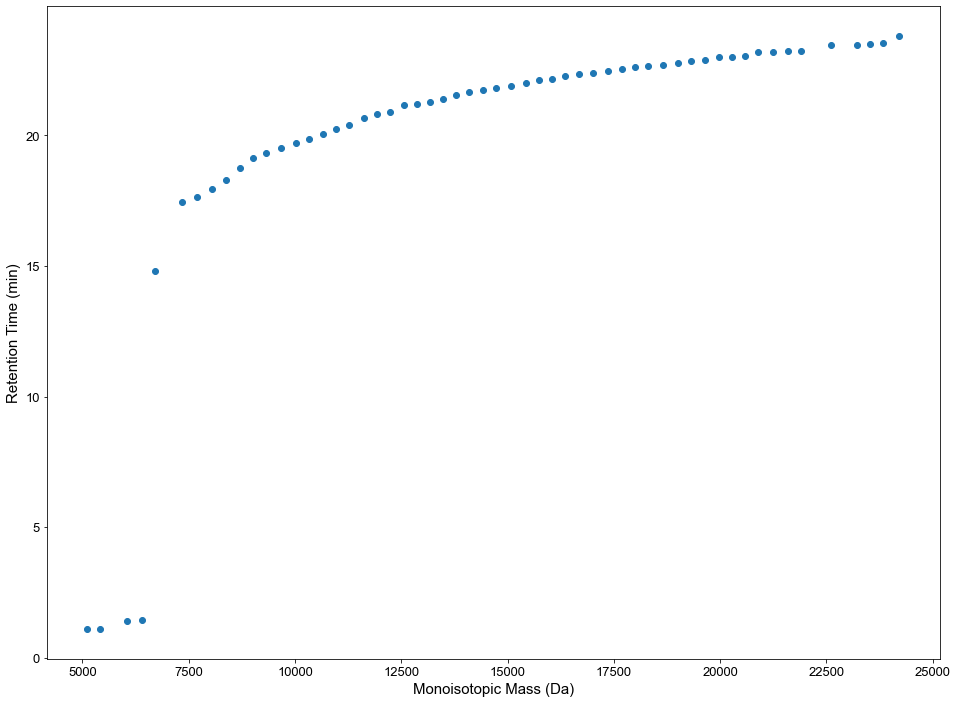

In [130]:
# plotly_zone(df_sample)
dft = df_203_3p.copy()
# dft.Mass += 1
dfm = match_dfs(dft, df_sample)
dft.Mass -= M
dfm_1 = match_dfs(dft, df_sample)

# plot_multi_zones([dfm, dfm_1])
plot_zone(dfm)
plotly_zone(dfm_1)

# low, high = 5400, 9400
# dfa = dfm[(dfm.Mass>low) & (dfm.Mass<high)].copy()
# dfb = dfm_k[(dfm_k.Mass>low) & (dfm_k.Mass<high)].copy()
# dfa['type'] = 'Regular'
# dfb['type'] = 'Regular+K'
# pd.concat([dfa, dfb]).to_excel('~/Downloads/m5Um_and_K.xlsx')

In [87]:
df_top = df_sample[df_sample.Mass>2800].sort_values('Vol', ascending=False).iloc[:300]
plotly_zone(df_top)
bcr = base_calling_random(df_top)
plotly_basecalling(*bcr)
len(bcr[1])

mass_x (300,) mass_y (300,)


197

In [88]:
# df_top = df_sample[df_sample.Mass>2800].sort_values('Vol', ascending=False).iloc[:300]
df_top = local_top(df1_ad, step=320, top=20)
plotly_zone(df_top)
bcr = base_calling_random(df_top)
# plotly_basecalling(*bcr)
len(bcr[1])

mass_x (1052,) mass_y (1052,)


1020

In [102]:
df_win = df_sample[(df_sample.Mass>5200)&(df_sample.Mass<5520)]
plotly_zones(df_sample, df_win)

mass_x (41,) mass_y (41,)
mass_x (69,) mass_y (69,)
mass_x (86,) mass_y (86,)
mass_x (98,) mass_y (98,)
mass_x (107,) mass_y (107,)
mass_x (116,) mass_y (116,)
mass_x (123,) mass_y (123,)
mass_x (130,) mass_y (130,)
mass_x (136,) mass_y (136,)
mass_x (142,) mass_y (142,)
mass_x (148,) mass_y (148,)
mass_x (154,) mass_y (154,)
mass_x (160,) mass_y (160,)
mass_x (166,) mass_y (166,)
mass_x (172,) mass_y (172,)
mass_x (178,) mass_y (178,)
mass_x (184,) mass_y (184,)
mass_x (190,) mass_y (190,)
mass_x (196,) mass_y (196,)
mass_x (202,) mass_y (202,)
mass_x (208,) mass_y (208,)
mass_x (214,) mass_y (214,)
mass_x (220,) mass_y (220,)
mass_x (226,) mass_y (226,)
mass_x (232,) mass_y (232,)
mass_x (238,) mass_y (238,)
mass_x (244,) mass_y (244,)
mass_x (250,) mass_y (250,)
mass_x (255,) mass_y (255,)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [14, 26, 34, 36, 41, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46,

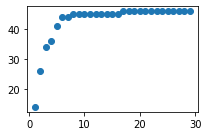

In [109]:
top_list = list(range(1, 30))
count_list = list()
for top in top_list:
    df_top = local_top(df_sample, top=top)
    bcr = base_calling_random(df_top)
    count_list.append(len(bcr[1]))

print(top_list, count_list)
fig = plt.figure(figsize=(3, 2))
plt.scatter(x=top_list, y=count_list)
fig.tight_layout()
svg_name = 'basecalling_count_glu_17_low'
fpath = f'/Users/bryan/Downloads/{svg_name}.svg'
plt.savefig(fpath, dpi=600, transparent=True)

In [47]:
plotly_zone(df_tops[df_tops.Mass>1900], y='RT')
# plotly_zone(df_tops[df_tops.Mass>1900], y='Vol')
df_zone = df_sample[(df_sample.Mass>1900)&(df_sample.Mass<24000)]
plotly_zone(df_zone, y='RT')
plotly_zone(df_zone, y='Vol')


In [48]:
bcr = base_calling_random(df_tops)
plotly_basecalling(*bcr)

mass_x (344,) mass_y (344,)


In [38]:

df_203_5p = pd.read_excel('~/Studio/tools/glu_24203_5p_6mG.xlsx')
df_203_3p = pd.read_excel('~/Studio/tools/glu_24203_3p_6mG.xlsx')

In [45]:
dft = df_203_3p.copy()
dfm1 = match_dfs(dft, df_sample)
dft.Mass += M
dfm2 = match_dfs(dft, df_sample)
plotly_zones(dfm1, dfm2)
plotly_zones(dfm1, dfm2, y='Vol')
dfm = df_203_3p.copy()
# dfm['Mass'] = 